<a href="https://colab.research.google.com/github/anomishra/Techademy_Artificial_intelligence/blob/master/Techedmy_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have corpus(collection of spam messages) as a dataset

In [104]:
# Counting the length of dataset
messages = [line.rstrip() for line in open('spamcol')]
print(len(messages))

5574


In [4]:
import pandas as pd

data = pd.read_csv('spamcol', sep='\t', names=["label", "message"])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


###groupby###
Use **groupby** to describe by label, ham and spam!

In [0]:
data.groupby('label').describe()

In [0]:
#Counting the length of sentences
#Creating new column in data; data['length] stores value for length of sentences
data['length'] = data['message'].apply(len)
data.head()

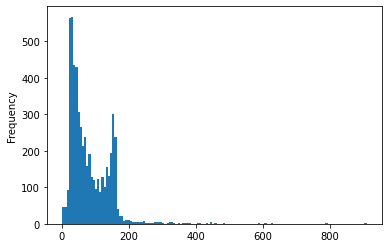

In [0]:
#visualizing the overall length or frequency of sentences in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
data['length'].plot(bins=140, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c88c91128>,
      dtype=object)

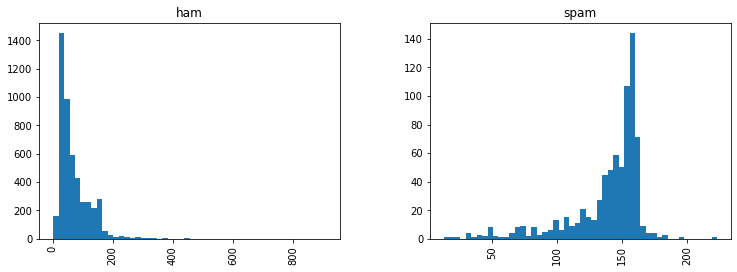

In [0]:
data.hist(column='length', by='label', bins=50,figsize=(12,4))

In [0]:
data.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [0]:
#printing the message having 910 length of sentence
data[data['length'] == 910]['message'].iloc[0]      #iloc to print the whole sentence

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(data['label'])
#transforming as 0=spam and 1=ham

In [49]:
y_enc

array([0, 0, 1, ..., 0, 0, 0])

Removing punctuations and stopwords from the dataset


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def text_process(mess):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [13]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Checking the tokenization

data['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:

# Construct a design matrix using an n-gram model and a tf-idf statistics
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_ngrams = vectorizer.fit_transform(data['message'])

In [53]:
#printing the shape of the matrix
X_ngrams.shape

(5572, 50506)

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

# Prepare the training and test sets using an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_ngrams,
    y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)


In [0]:
from sklearn.linear_model import LogisticRegression

# Train with a logistic regression on the training set
clf = LogisticRegression()
clf.fit(X_train, y_train)


# Testing: Evaluate the classifier on the test set
y_pred = clf.predict(X_test)


In [87]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       1.00      0.61      0.76       149

    accuracy                           0.95      1115
   macro avg       0.97      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



In [89]:
# Display a confusion matrix
#alternative approach for confusion matrix

import sklearn.metrics as metrics
pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred),
    index=[['actual', 'actual'], ['spam', 'ham']],
    columns=[['predicted', 'predicted'], ['spam', 'ham']])

predicted    
                 spam ham
actual spam       966   0
       ham         58  91